# Your first steps with Julia

## Przemysław Szufel

In [94]:
# Ctrl + ENTER
versioninfo()

Julia Version 1.10.0
Commit 3120989f39 (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 12 × 13th Gen Intel(R) Core(TM) i7-1355U
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, goldmont)
  Threads: 3 on 12 virtual cores
Environment:
  JULIA_DEPOT_PATH = c:\JuliaPkg\Julia-1.10.0
  JULIA_HOME = c:\Julia-1.10.0
  JULIA_NUM_THREADS = 3
  JULIA_VERSION = Julia-1.10.0


In [95]:
pwd()

"c:\\AAABIBLIOTEKA\\MIT_Boston\\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\\Day-1a_Your-first-steps-with-Julia"

In [27]:
using Pkg
pkg"status"

Project MIT_18S097 v0.1.0
Status `C:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Project.toml`
  [1520ce14] AbstractTrees v0.4.4
  [fbb218c0] BSON v0.3.7
  [6e4b80f9] BenchmarkTools v1.4.0
  [024491cd] BetaML v0.10.3
  [336ed68f] CSV v0.10.11
  [49dc2e85] Calculus v0.5.1
  [324d7699] CategoricalArrays v0.10.8
  [8f4d0f93] Conda v1.10.0
  [d58978e5] Dagger v0.18.6
  [a93c6f00] DataFrames v1.6.1
  [1313f7d8] DataFramesMeta v0.14.1
  [a077e3f3] DiffEqProblemLibrary v5.0.0
  [0c46a032] DifferentialEquations v7.12.0
  [31c24e10] Distributions v0.25.104
  [f6006082] EvoTrees v0.16.5
  [da1fdf0e] FreqTables v0.4.6
  [38e38edf] GLM v1.9.0
  [86223c79] Graphs v1.9.0
  [cd3eb016] HTTP v1.10.1
  [87dc4568] HiGHS v1.7.5
  [7073ff75] IJulia v1.24.2
  [b6b21f68] Ipopt v1.5.1
  [682c06a0] JSON v0.21.4
  [0f8b85d8] JSON3 v1.14.0
  [4076af6c] JuMP v1.17.0
  [add582a8] MLJ v0.20.2
  [c6f25543] MLJDecisionTreeInterface v0.4.0
  [f6097e2c] MultiJuMP v0.6.1
  [2dcacdae]

In [97]:
function f(x,y)
    x+y
end

f(x,y) = x+y

f (generic function with 2 methods)

In [98]:
f(5,12)

17

In [99]:
@code_lowered f(5,6)

CodeInfo(
1 ─ %1 = x + y
└──      return %1
)

In [100]:
@code_typed f(4,5)

CodeInfo(
1 ─ %1 = Base.add_int(x, y)::Int64
└──      return %1
) => Int64

In [101]:
@code_llvm f(5,6)

;  @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:5 within `f`
; Function Attrs: uwtable
define i64 @julia_f_6381(i64 signext %0

, i64 signext %1) #0 {
top:
; ┌ @ int.jl:87 within `+`
   %2 = add i64 %1, %0
; └
  ret i64 %2
}


In [102]:
@code_native f(5,6)

	.text
	.file	"f"
	.globl	julia_f_6407                    # -- Begin function julia_f_6407
	.p2align	4, 0x90
	.type	julia_f_6407,@function
julia_f_6407:                           # @julia_f_6407
; ┌ @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:5 within `f`
	.cfi_startproc
# %bb.0:                                # %top
	push	rbp
	.cfi_def_cfa_offset 16
	.cfi_offset rbp, -16
	mov	rbp, rsp
	.cfi_def_cfa_register rbp
; │┌ @ int.jl:87 within `+`
	lea	rax, [rcx + rdx]
; │└
	pop	rbp
	ret
.Lfunc_end0:
	.size	julia_f_6407, .Lfunc_end0-julia_f_6407
	.cfi_endproc
; └
                                        # -- End function
	.section	".note.GNU-stack","",@progbits


In [103]:
@code_native f(5.1,6)

	.text
	.file	"f"
	.globl	julia_f_6411                    # -- Begin function julia_f_6411
	.p2align	4, 0x90
	.type	julia_f_6411,@function
julia_f_6411:                           # @julia_f_6411
; ┌ @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:5 within `f`
	.cfi_startproc
# %bb.0:                                # %top
	push	rbp
	.cfi_def_cfa_offset 16
	.cfi_offset rbp, -16
	mov	rbp, rsp
	.cfi_def_cfa_register rbp
; │┌ @ promotion.jl:422 within `+`
; ││┌ @ promotion.jl:393 within `promote`
; │││┌ @ promotion.jl:370 within `_promote`
; ││││┌ @ number.jl:7 within `convert`
; │││││┌ @ float.jl:159 within `Float64`
	vcvtsi2sd	xmm1, xmm1, rdx
; ││└└└└
; ││ @ promotion.jl:422 within `+` @ float.jl:409
	vaddsd	xmm0, xmm1, xmm0
; │└
	pop	rbp
	ret
.Lfunc_end0:
	.size	julia_f_6411, .Lfunc_end0-julia_f_6411
	.cfi_endproc
; └
                                        # -- End function
	.section	".note.GNU-stac

In [104]:
v = [1,2,3,4]

4-element Vector{Int64}:
 1
 2
 3
 4

In [105]:
v3 = [ 3x for x in 1:9] #Python range(1,10)

9-element Vector{Int64}:
  3
  6
  9
 12
 15
 18
 21
 24
 27

In [106]:
v3[1:4]

4-element Vector{Int64}:
  3
  6
  9
 12

In [107]:
v₄= [ √x₁ for x₁ ∈ 1:9]

9-element Vector{Float64}:
 1.0
 1.4142135623730951
 1.7320508075688772
 2.0
 2.23606797749979
 2.449489742783178
 2.6457513110645907
 2.8284271247461903
 3.0

In [108]:
typeof(v₄)

Vector{Float64} (alias for Array{Float64, 1})

In [109]:
eltype(v₄)

Float64

In [110]:
b = Int[]
append!(b, 5)

1-element Vector{Int64}:
 5

In [111]:
c = []

Any[]

In [112]:
c = Complex(1,4)

1 + 4im

In [113]:
typeof(c)

Complex{Int64}

In [114]:
dump(c)

Complex{Int64}
  re: Int64 1
  im: Int64 4


In [115]:
c2=Complex{Float64}(1,4)

1.0 + 4.0im

In [116]:
typeof(c2)

ComplexF64 (alias for Complex{Float64})

In [117]:
c2=Complex{Float32}(1,4)
typeof(c2)

ComplexF32 (alias for Complex{Float32})

In [118]:
x = 1//2 + 1//4

3//4

In [119]:
typeof(x)

Rational{Int64}

In [120]:
c3=Complex{Rational{Int128}}(1//4,4)
typeof(c3)

Complex{Rational{Int128}}

### Data types

In [121]:
parse(Float64, "3.7")

3.7

In [122]:
one(Float64), zero(UInt32)

(1.0, 0x00000000)

In [123]:
@show Int64('a') 	# character to integer
@show Int64(2.0) 	# float to integer
#Int64(1.3) 		# inexact error
#Int64("a") 		# error no conversion possible
@show Float64(1) 	# integer to float
@show Bool(1) 		# boolean true
@show Bool(0) 		# boolean false
@show Char(89) 		# integer to char
@show zero(10.0) 	# zero of  arg type (Float64)
@show one(Int64) 	# one of type Int64
@show convert(Int64, 1.0)	# float to integer
@show parse(Int64, "1")

Int64('a') = 97
Int64(2.0) = 2
Float64(1) = 1.0
Bool(1) = true
Bool(0) = false
Char(89) = 'Y'
zero(10.0) = 0.0
one(Int64) = 1
convert(Int64, 1.0) = 1
parse(Int64, "1") = 1


1

In [124]:
@show Int <: Any
@show Int <: Union{Int, Float64}
@show typeof(nothing)

Int <: Any = true
Int <: Union{Int, Float64} = true
typeof(nothing) = Nothing


Nothing

In [125]:
f(x) = println("x= $x ")
res = f(1)
typeof(res)

x= 1 


Nothing

In [126]:
π

π = 3.1415926535897...

In [127]:
typeof(π)

Irrational{:π}

In [128]:
setprecision(10000)
@show BigFloat(π);

BigFloat(π) = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876611

### Tuples

In [129]:
@show () 		# empty tuple
@show (1,) 		# one element tuple
@show ("a", 1) 	# two element tuple
@show ('a', false)::Tuple{Char, Bool} # tuple type assertion
@show x = (1, 2, 3)
@show x[1] 		# first element
@show x[1:2] 	# (1, 2) (tuple)
# x[4] 		# bounds error
# x[1] = 1 	# error - tuple is not mutable
@show a, b = x 	# tuple unpacking a==1, b==2


() = ()
(1,) = (1,)
("a", 1) = ("a", 1)
('a', false)::Tuple{Char, Bool} = ('a', false)
x = (1, 2, 3) = (1, 2, 3)
x[1] = 1


x[1:2] = (1, 2)
(a, b) = x = (1, 2, 3)


(1, 2, 3)

In [130]:
t = (3, 3.0)
typeof(t)

Tuple{Int64, Float64}

In [131]:
k = (1, "k",  1//5)
typeof(k)

Tuple{Int64, String, Rational{Int64}}

In [132]:
v = collect(3:10)
v[7:end]

2-element Vector{Int64}:
  9
 10

### Matrices

In [133]:
Array{Char}(undef, 2, 3, 4) 	# 2x3x4 array of Chars
@show Array{Any}(undef, 2, 3) 	# 2x3 array of Any
@show zeros(5) 				# vector of Float64 zeros
@show ones(Int64, 2, 1) 	# 2x1 array of Int64 ones
@show trues(3), falses(3) 	# tuple of vector of trues and of falses

@show x = range(1, stop=2, length=5)  # iterator having 5 equally spaced elements
@show collect(x) 	# converts iterator to vector
@show 1:10 			# iterable from 1 to 10
@show 1:2:10 		# iterable from 1 to 9 with 2 skip
@show reshape(1:12, 3, 4)	# 3x4 array filled with 1:12 values


Array{Any}(undef, 2, 3) = Any[#undef #undef #undef; #undef #undef #undef]
zeros(5) = [0.0, 0.0, 0.0, 0.0, 0.0]
ones(Int64, 2, 1) = [1; 1;;]
(trues(3), falses(3)) = (Bool[1, 1, 1], Bool[0, 0, 0])
x = range(1, stop = 2, length = 5) = 1.0:0.25:2.0
collect(x) = [1.0, 1.25, 1.5, 1.75, 2.0]
1:10 = 1:10
1:2:10 = 1:2:9
reshape(1:12, 3, 4) = [1 4 7 10; 2 5 8 11; 3 6 9 12]


3×4 reshape(::UnitRange{Int64}, 3, 4) with eltype Int64:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [134]:
Matrix

Matrix (alias for Array{T, 2} where T)

In [135]:
y = Matrix{Int64}(undef, 2, 3)

2×3 Matrix{Int64}:
 140718518439072  2142127669312  2142165579552
   2142179348016  2142165579536  2142165579584

In [136]:
m = zeros( 4,5)
m[1,3] = 66
m
# 1-based numbering

4×5 Matrix{Float64}:
 0.0  0.0  66.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0

In [137]:
m[:,3] #array slicing

4-element Vector{Float64}:
 66.0
  0.0
  0.0
  0.0

In [138]:
a = reshape(1:12_000_000_000, 3_000, 4_000_000)


3000×4000000 reshape(::UnitRange{Int64}, 3000, 4000000) with eltype Int64:
    1  3001  6001   9001  12001  15001  18001  …  11999994001  11999997001
    2  3002  6002   9002  12002  15002  18002     11999994002  11999997002
    3  3003  6003   9003  12003  15003  18003     11999994003  11999997003
    4  3004  6004   9004  12004  15004  18004     11999994004  11999997004
    5  3005  6005   9005  12005  15005  18005     11999994005  11999997005
    6  3006  6006   9006  12006  15006  18006  …  11999994006  11999997006
    7  3007  6007   9007  12007  15007  18007     11999994007  11999997007
    8  3008  6008   9008  12008  15008  18008     11999994008  11999997008
    9  3009  6009   9009  12009  15009  18009     11999994009  11999997009
   10  3010  6010   9010  12010  15010  18010     11999994010  11999997010
    ⋮                                ⋮         ⋱               
 2992  5992  8992  11992  14992  17992  20992     11999996992  11999999992
 2993  5993  8993  11993  14993  179

In [139]:
a = reshape(1:12, 3, 4)
display(a[:, 3:end]) # 3x2 matrix
display(a[:, 1]) # 3 element vector
display(a[1, :]) # 4 element vector


3×2 Matrix{Int64}:
 7  10
 8  11
 9  12

3-element Vector{Int64}:
 1
 2
 3

4-element Vector{Int64}:
  1
  4
  7
 10

### Data structures

In [140]:
mutable struct Point1
  x::Int
  y::Float64
  meta
end
p = Point1(0, 0.0, "Origin")
@show p
@show p.x 		# access field
p.meta = 2		# change field value
@show fieldnames(typeof(p)) # get names of instance fields
@show fieldnames(Point1); 	# get names of type fields


p = Point1(0, 0.0, "Origin")
p.x = 0
fieldnames(typeof(p)) = (:x, :y, :meta)
fieldnames(Point1) = (:x, :y, :meta)


In [141]:
dump(:x)

Symbol x


In [142]:
dump(p)

Point1
  x: Int64 0
  y: Float64 

0.0
  meta: Int64 2


In [143]:
fieldnames(typeof(p))

(:x, :y, :meta)

In [144]:
dump(:a)

Symbol a


In [145]:
Base.@kwdef struct Point2
  x::Int64 = 1
  y::Float64 = 2.0
  meta
end
p2 = Point2(x=999, meta = "Origin")

Point2(999, 2.0, "Origin")

In [146]:
try
    p2.x = 33333
catch e
    println(e)
end

ErrorException("setfield!: immutable struct of type Point2 cannot be changed")


In [147]:
using Parameters
@with_kw mutable struct Point3
  x::Int64 = 1
  y::Float64 = 2.0
  meta
end
p3 = Point3(x=999, meta = "Origin")
p3.x = 66
p3

Point3
  x: Int64 66
  y: Float64 2.0
  meta: String "Origin"


In [148]:
Point3(;x=11,meta="ss")

Point3
  x: Int64 11
  y: Float64 2.0
  meta: String "ss"


### Dictionaries

In [149]:
x = Dict{Int, Float64}()
x[5] = 66.6
x[7] = 99

x

Dict{Int64, Float64} with 2 entries:
  5 => 66.6
  7 => 99.0

In [150]:
x2 = Dict{Any, Any}()
x2[5] = 66.6
x2[7] = 99

x2

Dict{Any, Any} with 2 entries:
  5 => 66.6
  7 => 99

In [151]:
typeof(1=>5)

Pair{Int64, Int64}

In [152]:
y = Dict(1=>5.5, 2=>4.5)

Dict{Int64, Float64} with 2 entries:
  2 => 4.5
  1 => 5.5

In [153]:
x = Dict{Int, Float64}() # empty dictionary mapping integers to floats
y = Dict(1=>5.5, 2=>4.5) 	# created dictionary
@show y[2] 					# get element
@show y[3] = 30.0 			# add element
@show haskey(y, 2) 			# check if key exists
@show keys(y), values(y) # iterators returning dictionary keys and values
@show delete!(y, 2)   # removing elements see also: pop!
@show get(y, 2, 777) # returns y[2] or 777 if not haskey(y,2)


y[2] = 4.5
y[3] = 30.0 = 30.0
haskey(y, 2) = true
(keys(y), values(y)) = ([2, 3, 1], [4.5, 30.0, 5.5])
delete!(y, 2) = Dict(3 => 30.0, 1 => 5.5)
get(y, 2, 777) = 777


777

### Text processing

In [154]:
x = 123
@show "$x + 3 = $(x+3)  3\$"

"$(x) + 3 = $(x + 3)  3\$" = "123 + 3 = 126  3\$"


"123 + 3 = 126  3\$"

In [155]:
@show "Hi " * "there!" 		# concatenation
@show "Ho " ^ 3 			# multiplication
@show string("a= ", 123.3) 	# joining elements to text
@show occursin("CD","ABCD") 	# occurence
@show "\"\n\t\$" # C-like escaping, additionally escape \$
                          # escaping - similiar to Matlab, Python, R
x = 123
@show "$x + 3 = $(x+3)"  # $ is an interpolation operator
@show "\$199" # that is why you need escaping

r = r"A|B" # full support for regular expressions
@show occursin(r, "CD") # false, not found
@show m = match(r, "ACBD"); # first regexp match


"Hi " * "there!" = "Hi there!"
"Ho " ^ 3 = "Ho Ho Ho "
string("a= ", 123.3) = "a= 123.3"
occursin("CD", "ABCD") = true
"\"\n\t\$" = "\"\n\t\$"
"$(x) + 3 = $(x + 3)" = "123 + 3 = 126"
"\$199" = "\$199"
occursin(r, "CD") = false


m = match(r, "ACBD") = RegexMatch("A")


In [156]:

x = 6

tekst = "hello $x and $(x*x+2x)"

"hello 6 and 48"

In [157]:
str = raw"c:\windows\n"

"c:\\windows\\n"

Note that `?` magic comment works only in Jupyter Notebook (not in Visual Studio Code)

In [26]:
?@raw_str

```
@raw_str -> String
```

Create a raw string without interpolation and unescaping. The exception is that quotation marks still must be escaped. Backslashes escape both quotation marks and other backslashes, but only when a sequence of backslashes precedes a quote character. Thus, 2n backslashes followed by a quote encodes n backslashes and the end of the literal while 2n+1 backslashes followed by a quote encodes n backslashes followed by a quote character.

# Examples

```jldoctest
julia> println(raw"\ $x")
\ $x

julia> println(raw"\"")
"

julia> println(raw"\\\"")
\"

julia> println(raw"\\x \\\"")
\\x \"
```


### Functions

In [159]:
f(x, y = 10) = x + y
# for this function the default value of y is 10
@show f(3, 2) # 5 is returned
@show f(3)    # 13 is returned


f(3, 2) = 5
f(3) = 13


13

In [160]:
function g(x::Int, y::Int) # limit arg type
  return y, x # tuple returned
end

g(x::Int, y::Bool) = x * y # multiple dispatch
g(x, y) = x - y
methods(g) # list of methods for g


# 3 methods for generic function "g" from Main:
 [1] g(x::Int64, y::Int64)
     @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:1
 [2] g(x::Int64, y::Bool)
     @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:5
 [3] g(x, y)
     @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:6

In [161]:
function g(x::Int, y::Int) # limit arg type
  return y, x # tuple returned
end

g(x::Int, y::Bool) = x * y # multiple dispatch

@show g(1,2)
@show g(1, true)


g(1, 2) = (2, 1)
g(1, true) = 1


1

In [162]:
methods(g)

# 3 methods for generic function "g" from Main:
 [1] g(x::Int64, y::Bool)
     @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:5
 [2] g(x::Int64, y::Int64)
     @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:1
 [3] g(x, y)
     @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:6

In [163]:
@show g(1,4)
@show g(1,true)
methods(g)

g(1, 4) = (4, 1)
g(1, true) = 1


# 3 methods for generic function "g" from Main:
 [1] g(x::Int64, y::Bool)
     @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:5
 [2] g(x::Int64, y::Int64)
     @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:1
 [3] g(x, y)
     @ c:\AAABIBLIOTEKA\MIT_Boston\2024_MIT_18.S097_Introduction-to-Julia-for-Data-Science\Day-1a_Your-first-steps-with-Julia\01_Basics.ipynb:6

### Operators

In [164]:
[1 2] .< [2 1]

1×2 BitMatrix:
 1  0

In [165]:
@show true || false # binary or operator (singeltons only)
@show 1 < 2 < 3     # condition chaining  is OK
@show [1 2] .< [2 1] # vectorization via dot operator "."
@show a = 5
@show 2a + 2(a+1) # multiplication can be ommited
@show x = [1 2 3]	  #matrix 1×3 Array{Int64,2}
@show y = [1, 2, 3]  #matrix 3-elements Array{Int64,1}
# vectors are vecticar and are different concept than horizontal 1-row matrix
#x + y # error
@show x .+ y # 3x3 matrix, dimension broadcasting
@show x + y' # 1x3 matrix
@show x * y; # array multiplication, 1-element vector (not scalar)


true || false = true
1 < 2 < 3 = true
[1 2] .< [2 1] = Bool[1 0]
a = 5 = 5
2a + 2 * (a + 1) = 22
x = [1 2 3] = [1 2 3]
y = [1, 2, 3] = [1, 2, 3]
x .+ y = [2 3 4; 3 4 5; 4 5 6]
x + y' = [2 4 6]
x * y = [14]


In [166]:
f(x,y) =  x<y ? x : y

f (generic function with 2 methods)

In [167]:
f(10,30)

10

In [168]:
a=  [1,2,3]
b=  [0,5,6]

3-element Vector{Int64}:
 0
 5
 6

In [169]:
f.(a,b)

3-element Vector{Int64}:
 0
 2
 3

In [170]:
a .* b

3-element Vector{Int64}:
  0
 10
 18

### Simple demo

In [12]:
function calc_pi(n, T)
    # n is the number of replications
    # T is the result type
    s = one(T)
    f = one(T)
    for i::T in 1:n
        f *= i/(2i+1)
        s += f
    end
    2s
end

calc_pi (generic function with 1 method)

In [13]:
π
typeof(π)

Irrational{:π}

In [14]:
π

π = 3.1415926535897...

In [16]:
setprecision(128)
for T in [Float16, Float64, BigFloat]
    display([calc_pi(2^n, T) for n in 1:10] .- big(π))
end

10-element Vector{BigFloat}:
 -0.2079989035897932384626433832795028841953
 -0.04393640358979323846264338327950288419529
 -0.002920778589793238462643383279502884195286
 -0.0009676535897932384626433832795028841952864
 -0.0009676535897932384626433832795028841952864
 -0.0009676535897932384626433832795028841952864
 -0.0009676535897932384626433832795028841952864
 -0.0009676535897932384626433832795028841952864
 -0.0009676535897932384626433832795028841952864
 -0.0009676535897932384626433832795028841952864

10-element Vector{BigFloat}:
 -0.2082593202564601123709413133087237632732
 -0.04317995517709517539637050332880069379612
 -0.002122972943642620687196138639994458005864
 -6.257552732991451957385031566516206699933e-06
 -7.004720171274999130895783071323069423495e-11
 -1.010643099614860550061510044659078695036e-15
 -1.010643099614860550061510044659078695036e-15
 -1.010643099614860550061510044659078695036e-15
 -1.010643099614860550061510044659078695036e-15
 -1.010643099614860550061510044659078695036e-15

10-element Vector{BigFloat}:
 -0.2082593202564599051293100499461695508588
 -0.04317995517709482576423068486680447150038
 -0.002122972943642004076114879103939885113761
 -6.257552731792070508295743788487263361139e-06
 -7.004625201779280778523170850117702545372e-11
 -1.176247251749589006092417763797343258237e-20
 -5.877471754111437539843682686111228389093e-38
 -5.877471754111437539843682686111228389093e-38
 -5.877471754111437539843682686111228389093e-38
 -5.877471754111437539843682686111228389093e-38

In [17]:
calc_pi(10000, BigFloat)- π


-5.877471754111437539843682686111228389093e-38

In [18]:
setprecision(1000) do
    calc_pi(1000, BigFloat)-π
end

3.73305447401287551596035817889526867846836578548683209848685735918386764390310253781776130839152440943837995972129697049686195008541612957936608326881572302493764266455330060109598030394360732604440196318506045247296205005918373516322071308450166041524279351541770592447787925691464383688807065164177119e-301

In [19]:
setprecision(2000) do
    @show BigFloat(π)
    end;

BigFloat(π) = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405131996


In [178]:
[calc_pi(n, Rational) for n in 1:20]

20-element Vector{Rational{Int64}}:
                8//3
               44//15
               64//21
              976//315
            10816//3465
           141088//45045
            47104//15015
          2404096//765765
         45693952//14549535
         45701632//14549535
         80863232//25741485
       5256312832//1673196525
       3153846272//1003917915
     457311809536//145568097675
     833925152768//265447707525
    4725585805312//1504203675975
   14176771899392//4512611027925
  524540820979712//166966608033225
  104908189597696//33393321606645
 4301236281540608//1369126185872445

### Integration with other programming languages

In [179]:
using PyCall
np = pyimport("numpy")


PyObject <module 'numpy' from 'c:\\JuliaPkg\\Julia-1.10.0\\conda\\3\\x86_64\\lib\\site-packages\\numpy\\__init__.py'>

In [180]:
a = np.zeros((4, 5), dtype="int32")
a

4×5 Matrix{Int32}:
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0

In [181]:
a[1,1]=5
np.mean(a)

0.25

In [182]:
b = py"{ (x,y):x*y for x in range(1,5) for y in range(1,3) }"
b

Dict{Any, Any} with 8 entries:
  (3, 2) => 6
  (1, 2) => 2
  (3, 1) => 3
  (1, 1) => 1
  (4, 2) => 8
  (4, 1) => 4
  (2, 2) => 4
  (2, 1) => 2

In [3]:
using Distributions, DataFrames, Random
Random.seed!(0);
dat = permutedims(rand(MvNormal([1 0.75; 0.75 1]), 1000))
df = DataFrame(dat, :auto)


Row,x1,x2
,Float64,Float64
1,-0.231909,0.448078
2,0.596762,1.76901
3,-0.0515618,0.736696
4,-1.69681,-2.67231
5,0.558366,-0.153191
6,-0.269885,0.1799
7,1.16034,1.06068
8,-0.441193,-0.241881
9,0.165543,-0.584969


You need to have RCall for this demo together with R present in the operating system, hence this will be shown by the instructor only. 
However you could try installing it yourself:
```
using Pkg
pkg"add RCall"
```

In [4]:
using RCall

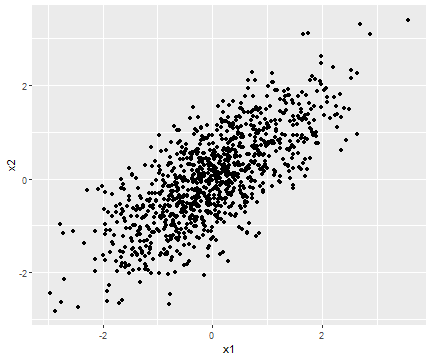

RObject{VecSxp}


In [8]:
# note this might not work in Visual Studio Code - use a plain Jupyter Notebook
@rlibrary ggplot2
display(ggplot(df,aes(x=:x1,y=:x2)) + geom_point())

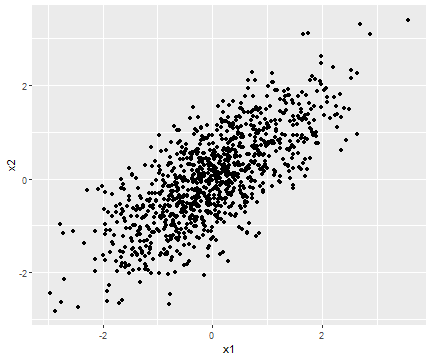

RObject{VecSxp}


In [9]:
# note this might not work in Visual Studio Code - use a plain Jupyter Notebook
R"library(ggplot2)"
R"ggplot($df,aes(x=x1,y=x2)) + geom_point()"


*Preparation of this workshop has been supported by the Polish National Agency for Academic Exchange under the Strategic Partnerships programme, grant number BPI/PST/2021/1/00069/U/00001.*

![SGH & NAWA](logo.png)